create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
82,2014,BMW,328i,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200
377,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,AS6,X,14.0,10.3,12.3,23,283
401,2014,FORD,FOCUS FFV,COMPACT,2.0,4,A6,X,8.8,6.4,7.7,37,177
948,2014,SUBARU,IMPREZA AWD,COMPACT,2.0,4,M5,X,9.6,7.1,8.5,33,196
777,2014,MERCEDES-BENZ,SLS AMG BLACK SERIES COUPE,TWO-SEATER,6.2,8,AS7,Z,18.7,13.9,16.5,17,380


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.shape

(1067, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(5)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
998,6,4.0,13.1,301
357,4,2.0,9.6,221
584,8,5.7,14.8,340
696,4,2.5,8.6,198
800,4,1.6,9.0,207


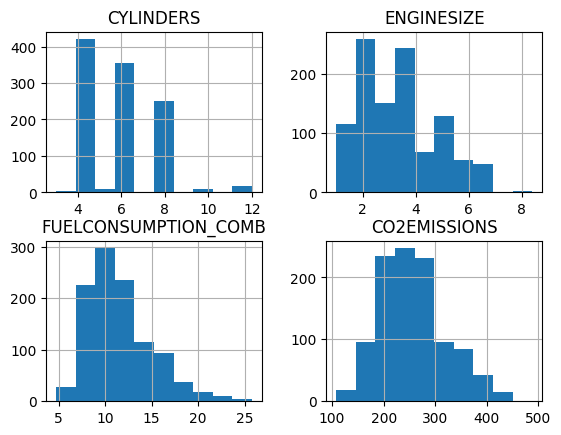

In [13]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

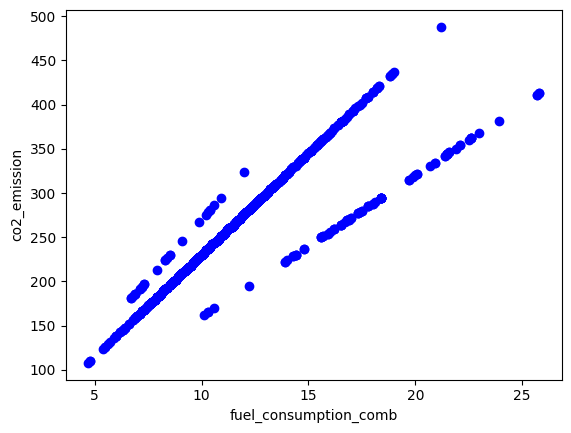

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel('fuel_consumption_comb')
plt.ylabel('co2_emission')
plt.show()

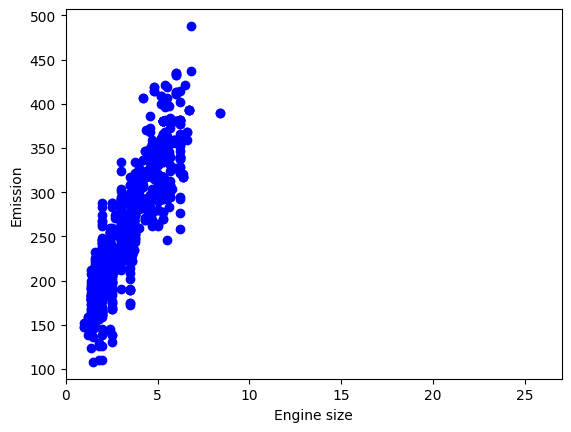

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

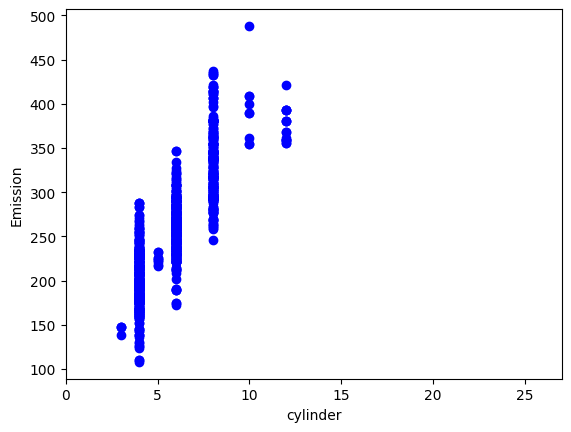

In [16]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("cylinder")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [17]:
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(853,)
(214,)
(853,)
(214,)


In [23]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print(f"coefficient : {regressor.coef_[0]}")
print(f'intercept : {regressor.intercept_}')

coefficient : 38.992978724434074
intercept : 126.28970217408721


Text(0, 0.5, 'Emission')

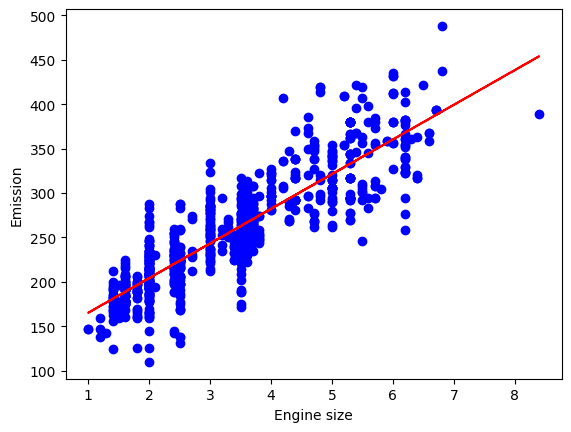

In [25]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, regressor.coef_ * x_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error,r2_score

y_test_pred = regressor.predict(x_test.reshape(-1,1))

print(f'mean absolute error : {mean_absolute_error(y_test_pred,y_test)}')
print(f'mean_squared_error " {mean_squared_error(y_test_pred,y_test)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test_pred,y_test)}')
print(f'r2_score : {r2_score(y_test_pred,y_test)}')


mean absolute error : 24.09725741170784
mean_squared_error " 985.9381692274999
root_mean_squared_error : 31.399652374309813
r2_score : 0.6782015355440534


Text(0, 0.5, 'Emission')

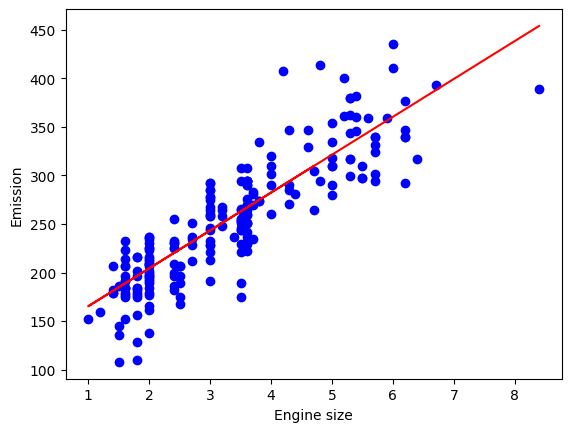

In [28]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, regressor.coef_ * x_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
x= cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1065,)
(2,)
(1065,)
(2,)


In [31]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print(f'coefficinet :{regressor.coef_[0]}')
print(f'intercept :{regressor.intercept_}')

coefficinet :16.216806167556342
intercept :68.40649082569024


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
y_test_ = regressor.predict(x_test.reshape(-1,1))
print(f'mean_absolute_error : {mean_absolute_error(y_test_,y_test)}')
print(f'mean_squared_error : {mean_squared_error(y_test_,y_test)}')
print(f'root_mean_squared_error : {root_mean_squared_error(y_test_,y_test)}')
print(f'r2_score : {r2_score(y_test_,y_test)}')

mean_absolute_error : 12.309748898398581
mean_squared_error : 236.57370547891253
root_mean_squared_error : 15.380952684372724
r2_score : 0.7223543903178089


MSE is smaller when we train using FUELCONSUMPTION_COMB rather than ENGINESIZE.